In [1]:
pip install gym

#Implementing the Agent

We will create an agent that takes an action based on a linear combination of the observation vector and a randomly initialized weight vector.



In [18]:
import gym
import numpy as np

# Define the CartPole environment
env = gym.make('CartPole-v1')

# Function to initialize weights
def initialize_weights():
    return np.random.uniform(-1, 1, 4)

# Function to select action based on observation and weights
def select_action(observation, weights):
    return 1 if np.dot(observation, weights) >= 0 else 0

# Function to run an episode and return the accumulated reward
def run_episode(env, weights):
    observation = env.reset()
    total_reward = 0
    for _ in range(300):
        action = select_action(observation, weights)
        observation, reward, done, _ = env.step(action)
        total_reward += reward
        if done:
            break
    return total_reward

# Evaluate an agent with random weights
weights = initialize_weights()
score = run_episode(env, weights)
print(f"Score with random weights: {score}")


Score with random weights: 88.0


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym

#Training the Agent Using Random Search
We will train the agent by sampling different weights and keeping the weights that yield the highest reward.

In [7]:
# Function to perform random search
def random_search(env, num_samples=10000):
    best_weights = None
    best_score = 0
    for _ in range(num_samples):
        weights = initialize_weights()
        score = run_episode(env, weights)
        if score > best_score:
            best_score = score
            best_weights = weights
    return best_weights, best_score

# Train the agent using random search
best_weights, best_score = random_search(env)
print(f"Best weights: {best_weights}")


Best weights: [-0.11496731 -0.17164942  0.81729976  0.18346065]


In [11]:
# Evaluate an agent with random weights
weights = best_weights
score = run_episode(env, weights)
print(f"Score with best weights: {score}")

Score with best weights: 94.0


#Evaluate the Random Search Scheme
We will evaluate how many episodes it takes for the agent to reach a score of 200.

Average number of episodes needed: 13.289


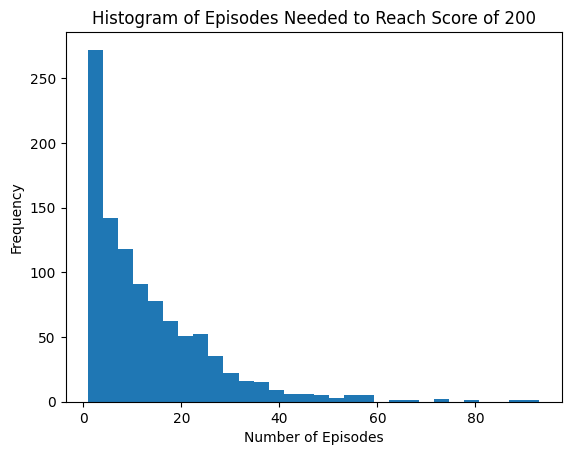

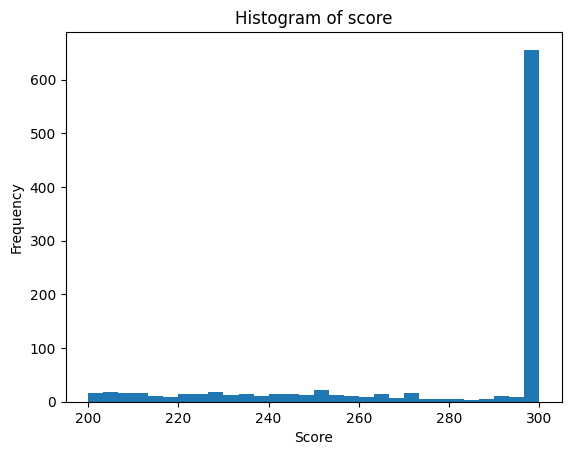

In [19]:
import matplotlib.pyplot as plt

def evaluate_random_search(env, num_searches=1000, target_score=200):
    episodes_needed = []
    best_weights2 = []
    best_scores = []
    for _ in range(num_searches):
        episodes = 0
        while True:
            episodes += 1
            weights = initialize_weights()
            score = run_episode(env, weights)
            if score >= target_score:
                episodes_needed.append(episodes)
                best_weights2.append(weights)
                best_scores.append(score)
                break
    return episodes_needed, best_weights2, best_scores

# Evaluate the random search scheme
episodes_needed, best_weights2, best_scores = evaluate_random_search(env)
average_episodes = np.mean(episodes_needed)
print(f"Average number of episodes needed: {average_episodes}")

# Plot histogram of the number of episodes needed
plt.hist(episodes_needed, bins=30)
plt.xlabel('Number of Episodes')
plt.ylabel('Frequency')
plt.title('Histogram of Episodes Needed to Reach Score of 200')
plt.show()

plt.hist(best_scores, bins=30)
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.title('Histogram of score')
plt.show()


# We observe that most of the weights that achieved the target score of 200 also reached the maximum score limit of 300 in many episodes. This indicates that these weights have the potential to exceed our limit and achieve even higher scores. Therefore, these weights could be considered ideal solutions for maximizing performance in the CartPole-v1 environment. Additionally, we can infer that once a high score is achieved, the method is effective, demonstrating the viability of this random search approach for solving this problem.